In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from helpers.plot_helpers import *
from helpers.computational_tools import gaussian_remesh
%load_ext autoreload
%autoreload 3
import warnings
warnings.filterwarnings("ignore")

In [2]:
from helpers.collection_of_experiments import *

In [3]:
ds = CollectionOfExperiments.init_folder('/home/ctrsp-2024/pp2681/experiments/Feb2022/bare', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/home/ctrsp-2024/pp2681/experiments/generalization-boundary10', additional_subfolder='output', prefix='boundary10')
ds += CollectionOfExperiments.init_folder('/home/ctrsp-2024/pp2681/experiments/SSM-streamfunction', additional_subfolder='output', prefix='SSM-streamfunction')

In [4]:
for RR in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    ds.remesh('R64', RR, operator=gaussian_remesh, FGR=np.sqrt(6), exp=f'R64_{RR}_FGR-sqrt6')

for RR in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    for file in [f'/home/ctrsp-2024/pp2681/notebooks/filtered-data/R64_{RR}_FGR-sqrt6-part1-f32.nc', 
                 f'/home/ctrsp-2024/pp2681/notebooks/filtered-data/R64_{RR}_FGR-sqrt6-part2-f32.nc',
                 f'/home/ctrsp-2024/pp2681/notebooks/filtered-data/R64_{RR}_FGR-sqrt6-part3-f32.nc']:
            dataset = xr.open_dataset(file, decode_times=False, chunks={'Time':5})
            for key in dataset.keys():
                var = dataset[key]
                var['Time'] = ds['R64'].u['Time']
                setattr(ds[f'R64_{RR}_FGR-sqrt6'], key, var)

Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2_FGR-sqrt6
Experiment R64 coarsegrained to R3 is created. Its identificator=R64_R3_FGR-sqrt6
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4_FGR-sqrt6
Experiment R64 coarsegrained to R5 is created. Its identificator=R64_R5_FGR-sqrt6
Experiment R64 coarsegrained to R6 is created. Its identificator=R64_R6_FGR-sqrt6
Experiment R64 coarsegrained to R7 is created. Its identificator=R64_R7_FGR-sqrt6
Experiment R64 coarsegrained to R8 is created. Its identificator=R64_R8_FGR-sqrt6


In [5]:
ds.exps

['R32',
 'R8',
 'R64',
 'R2',
 'R4',
 'R16',
 'R3',
 'R5',
 'R6',
 'R7',
 'R2-0.01',
 'R2-0.03',
 'R3-0.01',
 'R3-0.03',
 'R4-0.01',
 'R4-0.03',
 'R5-0.01',
 'R5-0.03',
 'R6-0.01',
 'R6-0.03',
 'R7-0.01',
 'R7-0.03',
 'R8-0.01',
 'R8-0.03',
 'boundary10-zelong-False-ssm-False-reynolds-False-reduce-0-R2',
 'boundary10-zelong-False-ssm-False-reynolds-False-reduce-0-R3',
 'boundary10-zelong-False-ssm-False-reynolds-False-reduce-0-R4',
 'boundary10-zelong-False-ssm-False-reynolds-False-reduce-0-R5',
 'boundary10-zelong-False-ssm-False-reynolds-False-reduce-0-R6',
 'boundary10-zelong-False-ssm-False-reynolds-False-reduce-0-R7',
 'boundary10-zelong-False-ssm-False-reynolds-False-reduce-0-R8',
 'boundary10-zelong-False-ssm-False-reynolds-False-reduce-0-R4-FGR-2',
 'boundary10-zelong-False-ssm-False-reynolds-False-reduce-0-R4-FGR-sqrt12',
 'boundary10-zelong-False-ssm-False-reynolds-False-reduce-0-R8-FGR-2',
 'boundary10-zelong-False-ssm-False-reynolds-False-reduce-0-R8-FGR-sqrt12',
 'boundary

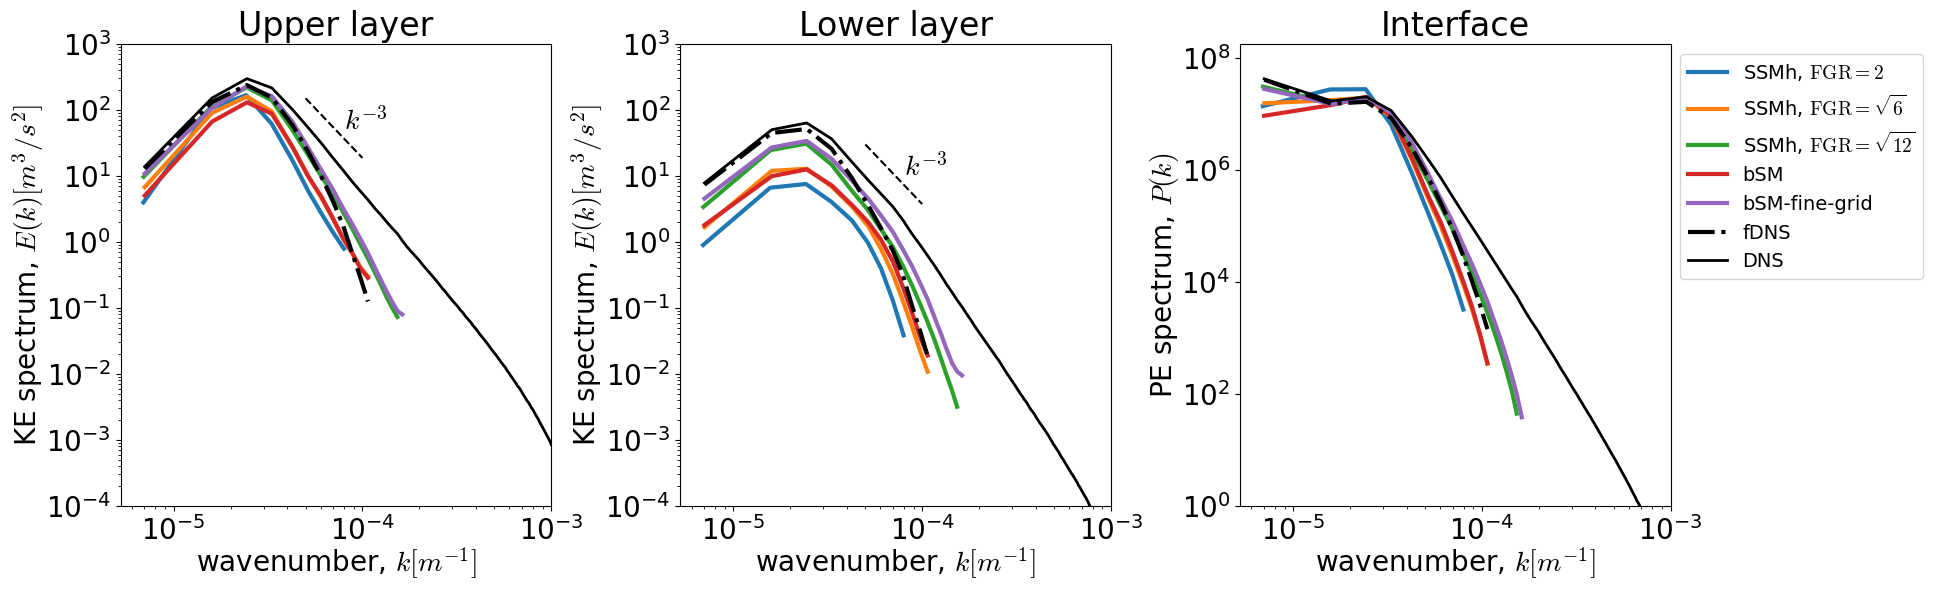

In [21]:
yellow = [0.9290, 0.6940, 0.1250]
violet = [0.4940, 0.1840, 0.5560]
lightblue = [0.3010, 0.7450, 0.9330]
default_rcParams({'font.size':20, 'figure.subplot.wspace': 0.3, 'figure.subplot.hspace': 0.15})
ds.plot_KE_spectrum([
                     'boundary10-zelong-False-ssm-False-reynolds-True-reduce-0-R8-FGR-sqrt12', 
                     'boundary10-zelong-False-ssm-False-reynolds-True-reduce-0-R8-FGR-sqrt12', 
                     'boundary10-zelong-False-ssm-False-reynolds-True-reduce-0-R8-FGR-sqrt12',
                     'R4-0.03', 'R6-0.03',
                     'R64_R4_FGR-sqrt6', 'R64'],
                     labels = ['SSMh, $\mathrm{FGR}=2$', 
                               'SSMh, $\mathrm{FGR}=\sqrt{6}$', 
                               'SSMh, $\mathrm{FGR}=\sqrt{12}$',
                               'bSM', 'bSM-fine-grid',
                               'fDNS', 'DNS'],
                    color={'R64_R4_FGR-sqrt6': 'k', 'R64': 'k'}, ls={'R64_R4_FGR-sqrt6': '-.'});
#plt.savefig('explicit-filtering-PE-SSMh-R4.pdf')

In [22]:
default_rcParams({'font.size':12, 'figure.subplot.wspace': 0.3, 'figure.subplot.hspace': 0.15})
def plot(idx=0, zl=0):
    ds.plot_RV([         'SSM-streamfunction-bare-0.03-R4-FGR-2', 
                         'SSM-streamfunction-bare-0.03-R4', 
                         'SSM-streamfunction-bare-0.03-R4-FGR-sqrt12',
                         'R4-0.03', 'R6-0.03',
                         'R64_R8_FGR-sqrt6', 'R64'],
                         labels = ['$\mathrm{FGR}=2$', 
                                   '$\mathrm{FGR}=\sqrt{6}$', 
                                   '$\mathrm{FGR}=\sqrt{12}$',
                                   'bSM', 'bSM-fine-grid',
                                   'fDNS', 'DNS'], idx=idx, zl=zl);
#plt.savefig('explicit-filtering-DbMM-Reynolds-no-clip.pdf')

CPU times: user 439 ms, sys: 284 ms, total: 723 ms
Wall time: 4.72 s


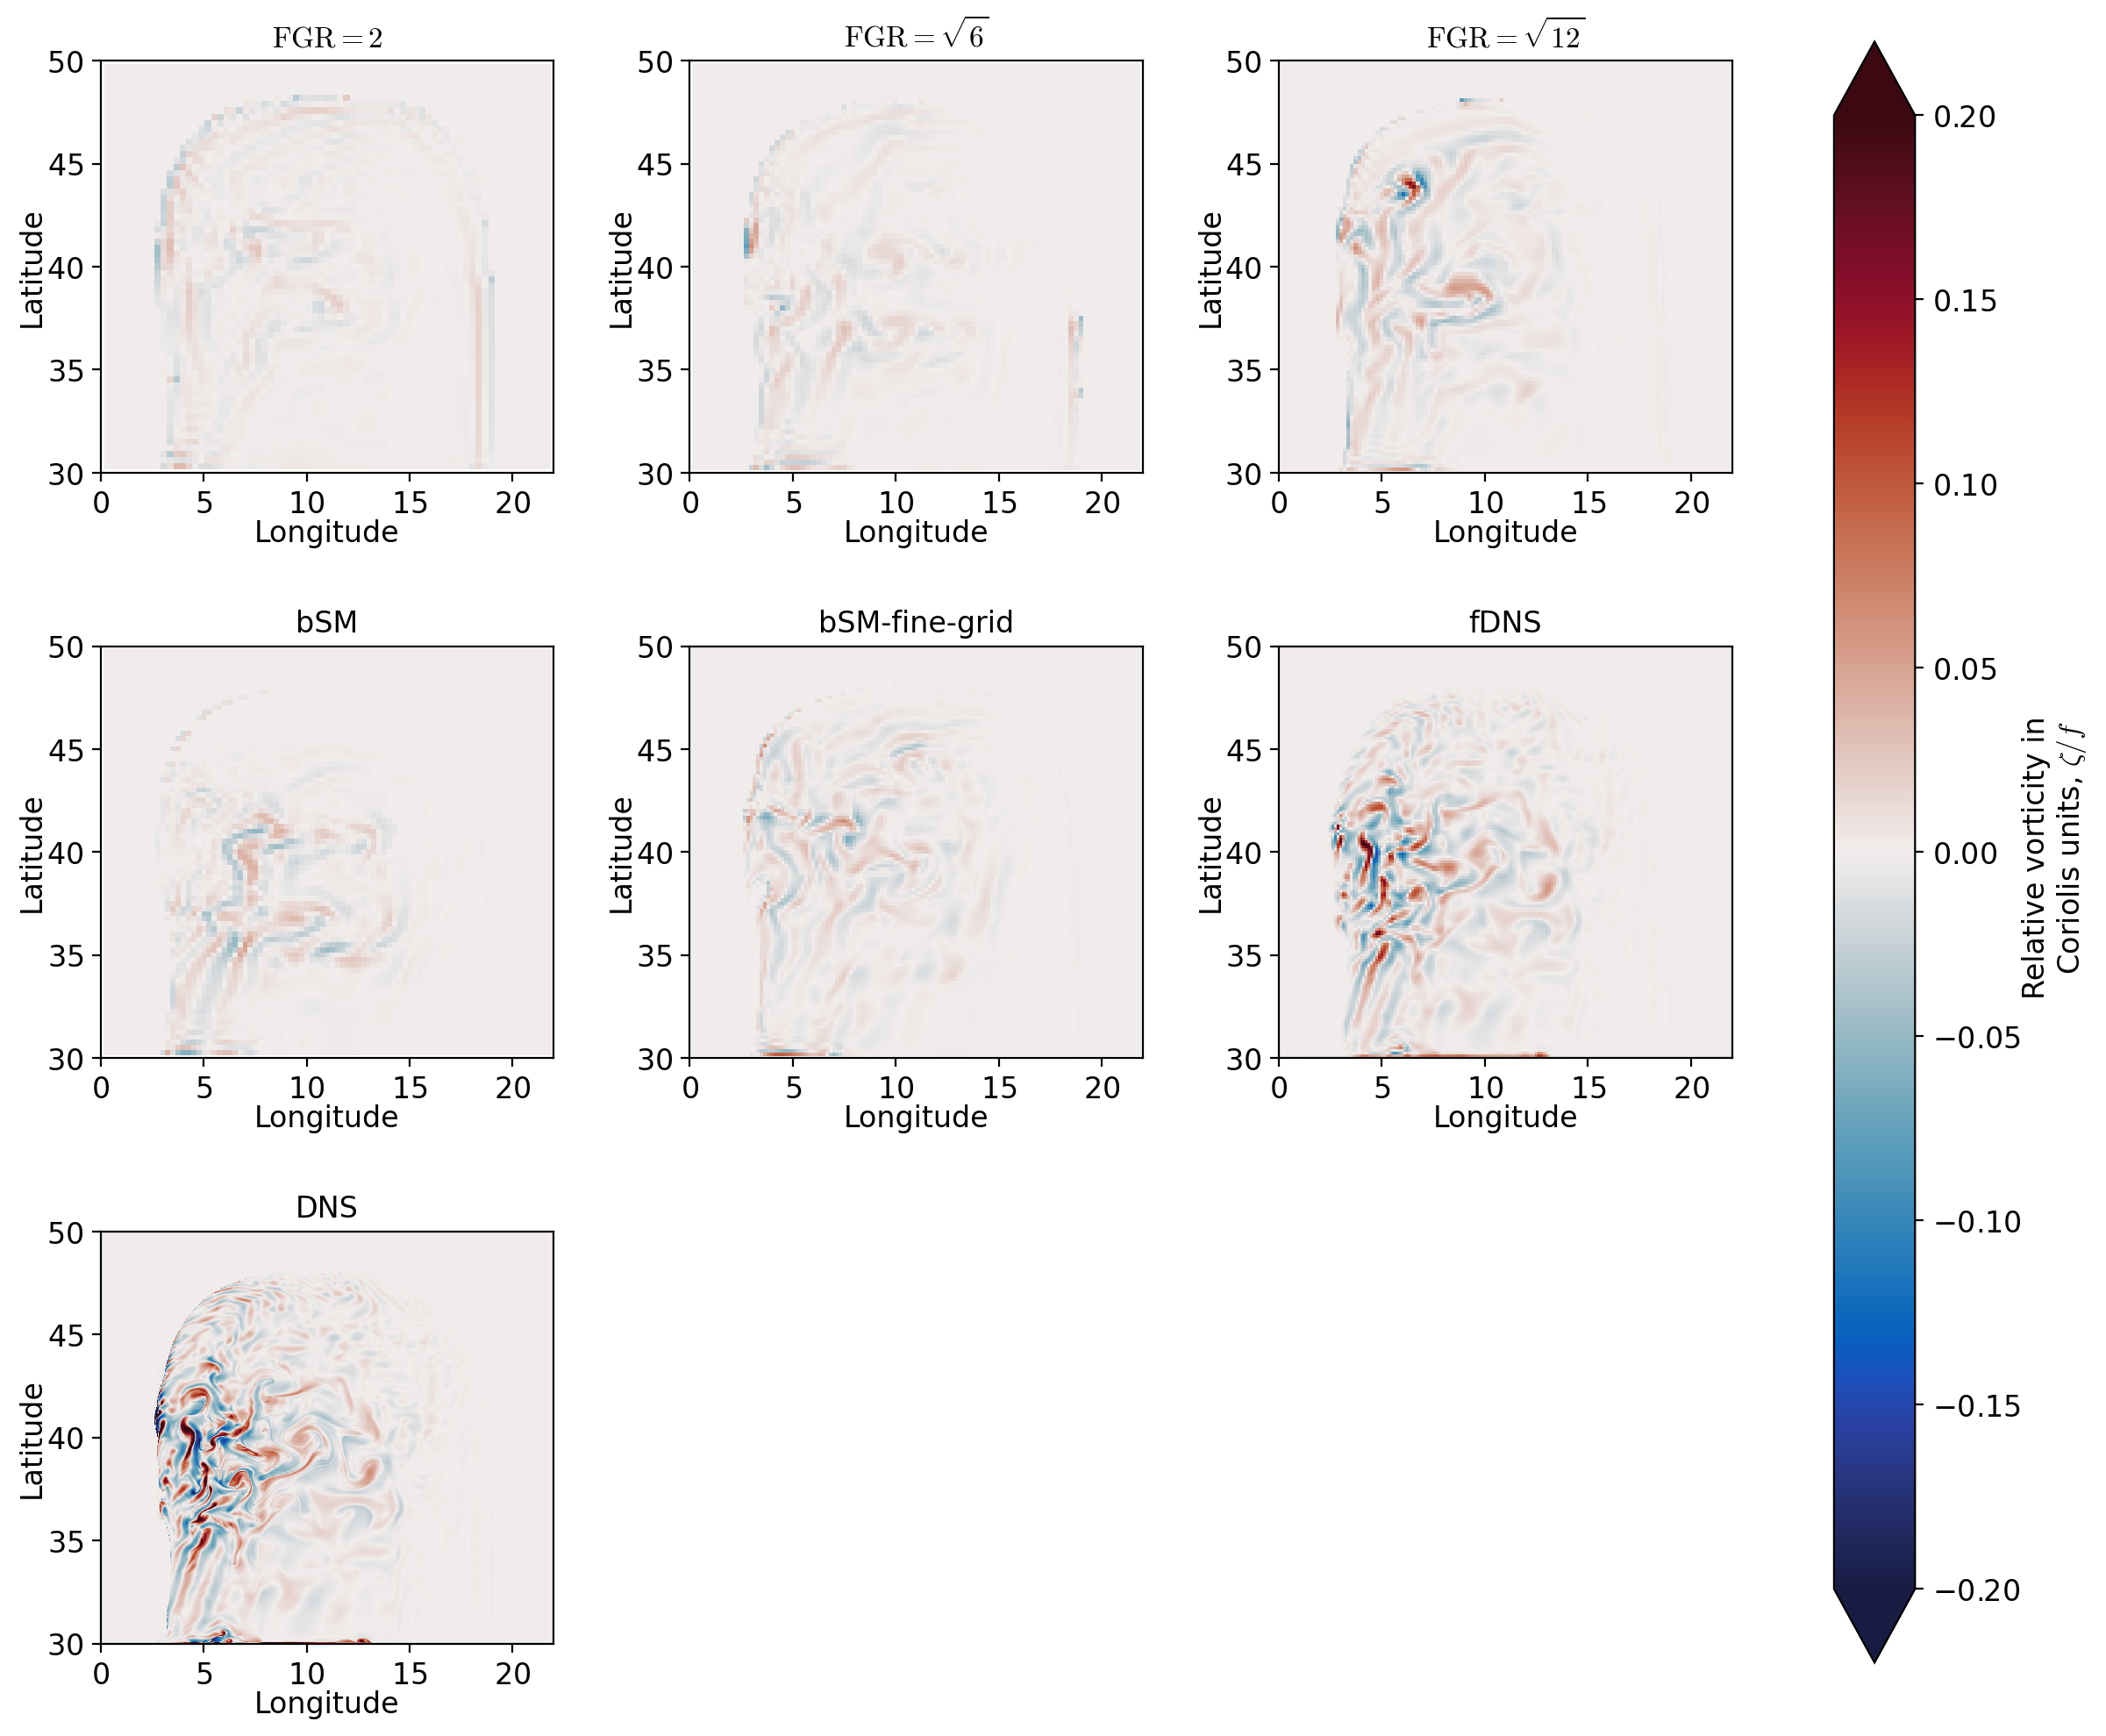

In [27]:
%time plot(-140,zl=1)

In [50]:
create_animation(plot, range(0,243), filename='DbMM-Reynolds-no-clip-FGR.gif', dpi=200, FPS=18, loop=0, deezering=True)

Animation at FPS=18 will last for 13.5 seconds


# Lower bound on the viscosity coefficient. Seems at FGR=sqrt(12), for all resolutions, it is reasonable to have C_S=0.02 as a lower bound

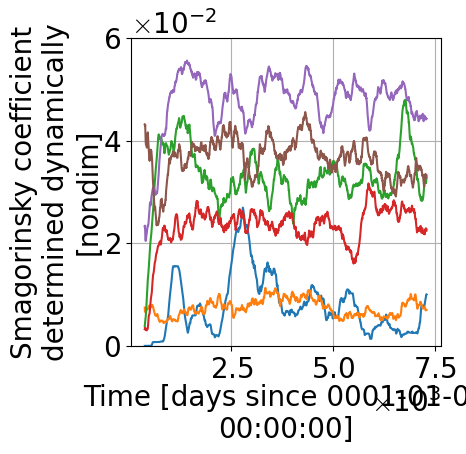

In [191]:
series = ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R2-FGR-sqrt12'].series_diag
series.smag_const.isel(zl=0).rolling({'Time':365}).mean().plot()
series.smag_const.isel(zl=1).rolling({'Time':365}).mean().plot()

series = ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R4-FGR-sqrt12'].series_diag
series.smag_const.isel(zl=0).rolling({'Time':365}).mean().plot()
series.smag_const.isel(zl=1).rolling({'Time':365}).mean().plot()

series = ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R8-FGR-sqrt12'].series_diag
series.smag_const.isel(zl=0).rolling({'Time':365}).mean().plot()
series.smag_const.isel(zl=1).rolling({'Time':365}).mean().plot()

plt.ylim([0,0.06])
plt.title('')
plt.grid()

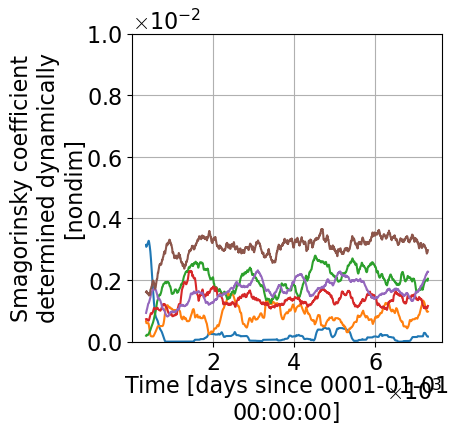

In [209]:
series = ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R2-FGR-2'].series_diag
series.smag_const.isel(zl=0).rolling({'Time':365}).mean().plot()
series.smag_const.isel(zl=1).rolling({'Time':365}).mean().plot()

series = ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R4-FGR-2'].series_diag
series.smag_const.isel(zl=0).rolling({'Time':365}).mean().plot()
series.smag_const.isel(zl=1).rolling({'Time':365}).mean().plot()

series = ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R8-FGR-2'].series_diag
series.smag_const.isel(zl=0).rolling({'Time':365}).mean().plot()
series.smag_const.isel(zl=1).rolling({'Time':365}).mean().plot()

plt.ylim([0,0.01])
plt.title('')
plt.grid()

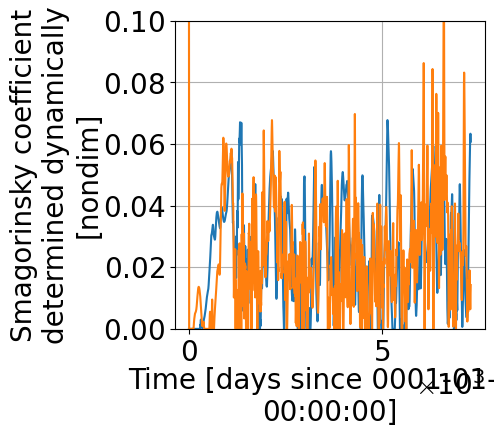

In [247]:
series = ds['boundary10-zelong-True-ssm-True-reynolds-False-reduce-0-R2-FGR-sqrt12'].series_diag
series.smag_const.isel(zl=0).rolling({'Time':1}).mean().plot()
series.smag_const.isel(zl=1).rolling({'Time':1}).mean().plot()

# series = ds['boundary10-zelong-True-ssm-False-reynolds-False-reduce-0-R4-FGR-sqrt12'].series_diag
# series.smag_const.isel(zl=0).rolling({'Time':365}).mean().plot()
# series.smag_const.isel(zl=1).rolling({'Time':365}).mean().plot()

# series = ds['boundary10-zelong-True-ssm-False-reynolds-False-reduce-0-R8-FGR-sqrt12'].series_diag
# series.smag_const.isel(zl=0).rolling({'Time':365}).mean().plot()
# series.smag_const.isel(zl=1).rolling({'Time':365}).mean().plot()

plt.ylim([0,0.1])
plt.title('')
plt.grid()

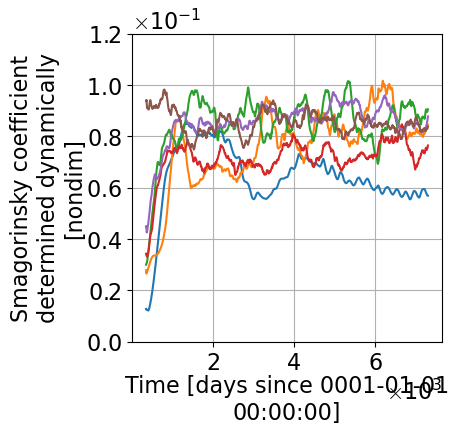

In [207]:
series = ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-1-R2-FGR-sqrt12'].series_diag
series.smag_const.isel(zl=0).rolling({'Time':365}).mean().plot()
series.smag_const.isel(zl=1).rolling({'Time':365}).mean().plot()

series = ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-1-R4-FGR-sqrt12'].series_diag
series.smag_const.isel(zl=0).rolling({'Time':365}).mean().plot()
series.smag_const.isel(zl=1).rolling({'Time':365}).mean().plot()

series = ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-1-R8-FGR-sqrt12'].series_diag
series.smag_const.isel(zl=0).rolling({'Time':365}).mean().plot()
series.smag_const.isel(zl=1).rolling({'Time':365}).mean().plot()

plt.ylim([0,0.12])
plt.title('')
plt.grid()

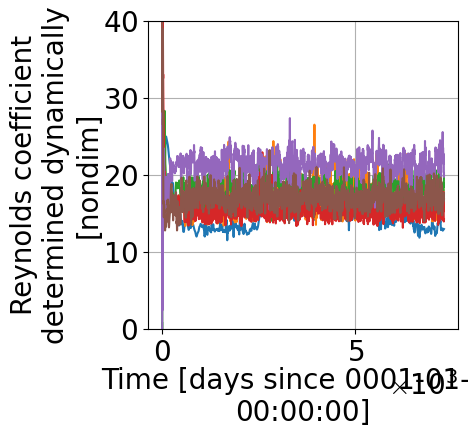

In [194]:
dt = 1
series = ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R2-FGR-sqrt12'].series_diag
series.CR_const.isel(zl=0).rolling({'Time':dt}).mean().plot()
series.CR_const.isel(zl=1).rolling({'Time':dt}).mean().plot()

series = ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R4-FGR-sqrt12'].series_diag
series.CR_const.isel(zl=0).rolling({'Time':dt}).mean().plot()
series.CR_const.isel(zl=1).rolling({'Time':dt}).mean().plot()

series = ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R8-FGR-sqrt12'].series_diag
series.CR_const.isel(zl=0).rolling({'Time':dt}).mean().plot()
series.CR_const.isel(zl=1).rolling({'Time':dt}).mean().plot()

plt.ylim([0,40])
plt.title('')
plt.grid()

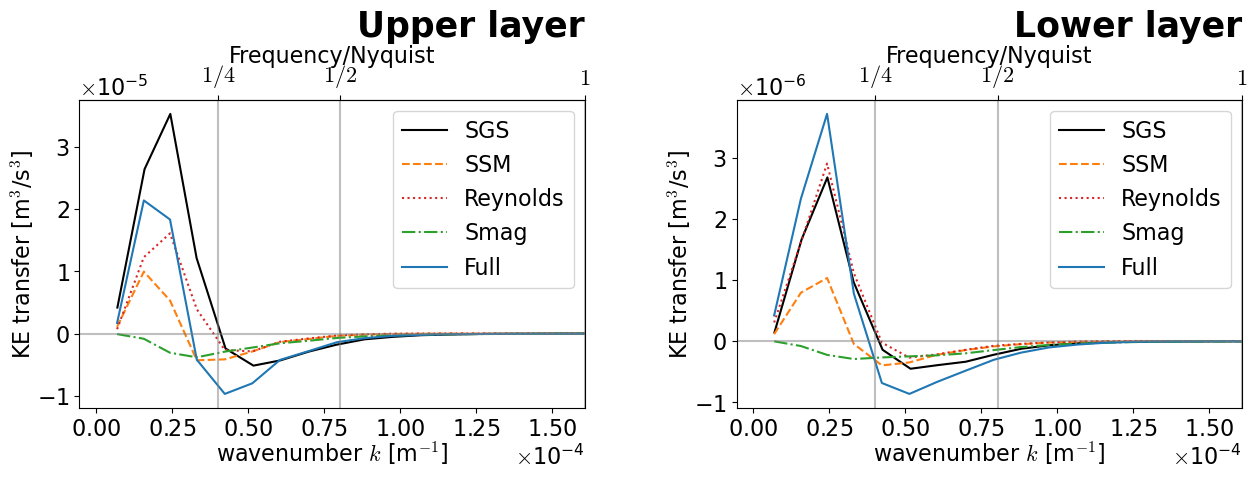

In [203]:
ds.plot_transfer('boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R4-FGR-sqrt12', target='R64_R4_FGR-sqrt6', callback=False)

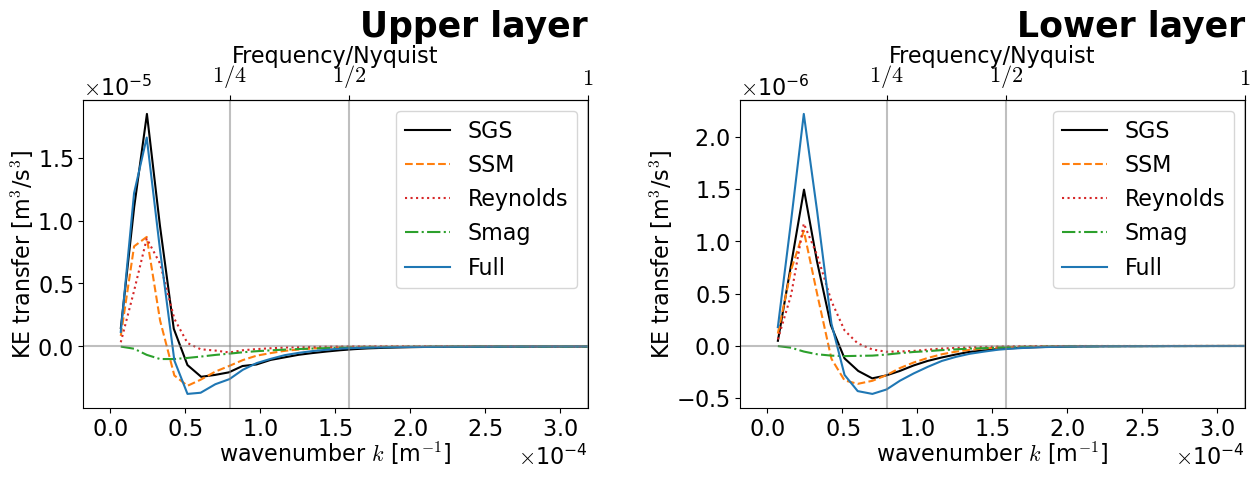

In [204]:
ds.plot_transfer('boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R8-FGR-sqrt12', target='R64_R8_FGR-sqrt6', callback=False)

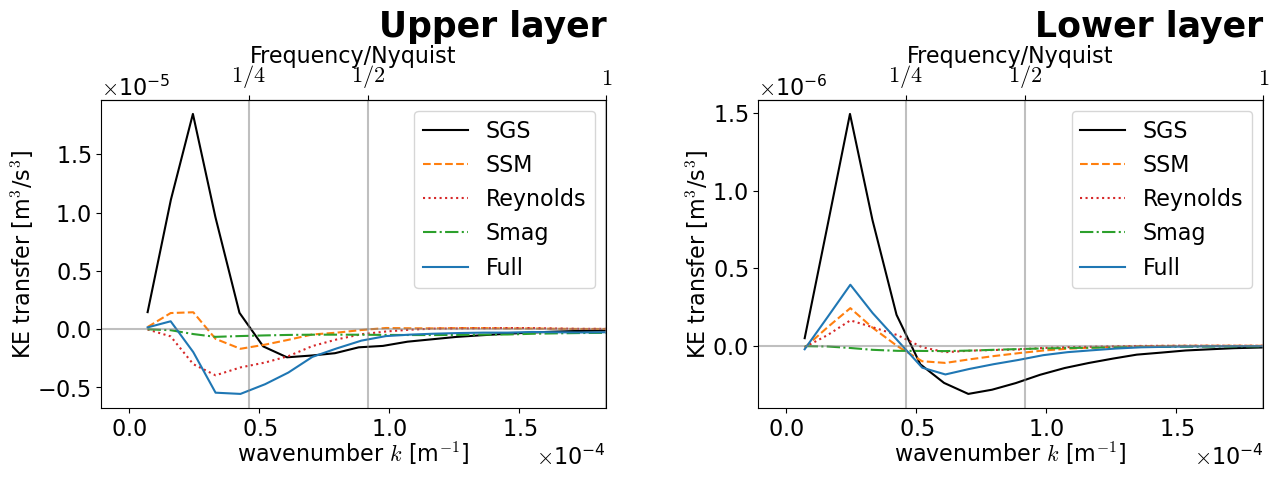

In [205]:
ds.plot_transfer('boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R8-FGR-2', target='R64_R8_FGR-sqrt6', callback=False)

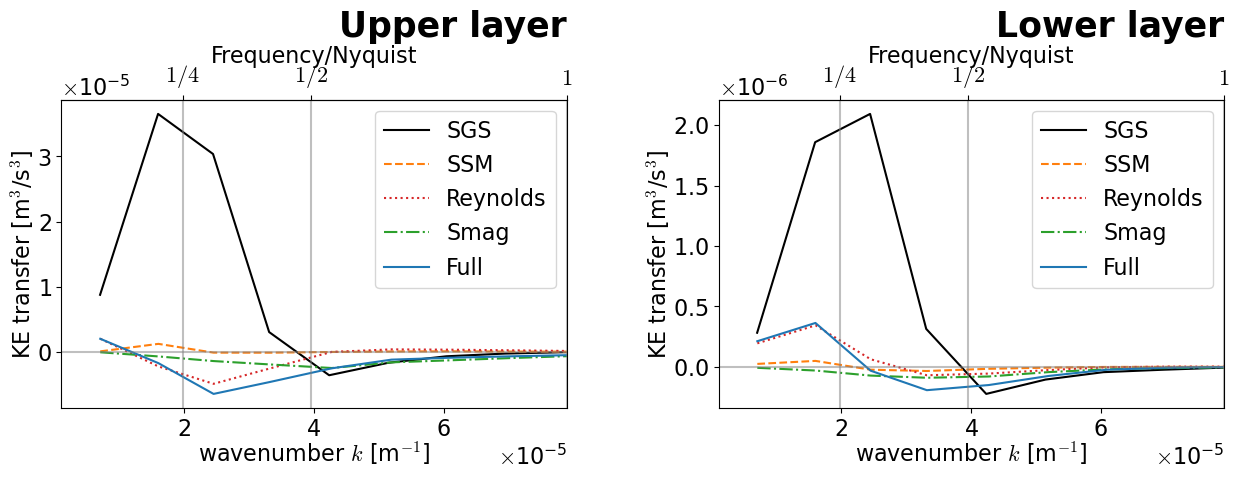

In [210]:
ds.plot_transfer('boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R2-FGR-sqrt12', target='R64_R2_FGR-sqrt6', callback=False)

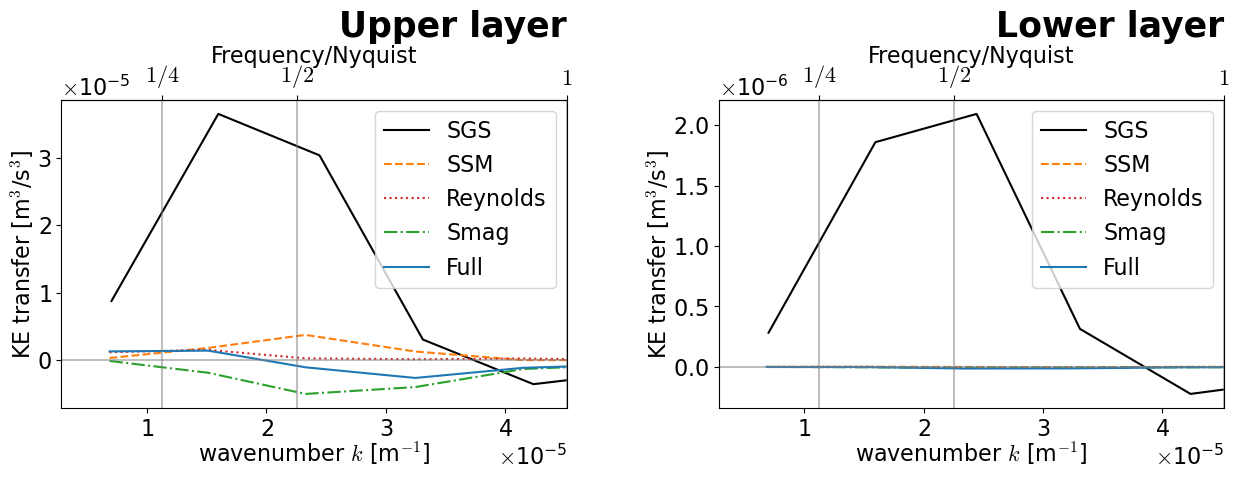

In [211]:
ds.plot_transfer('boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R2-FGR-2', target='R64_R2_FGR-sqrt6', callback=False)

In [213]:
#ds.plot_transfer('boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R2', target='R64_R2_FGR-sqrt6', callback=False)

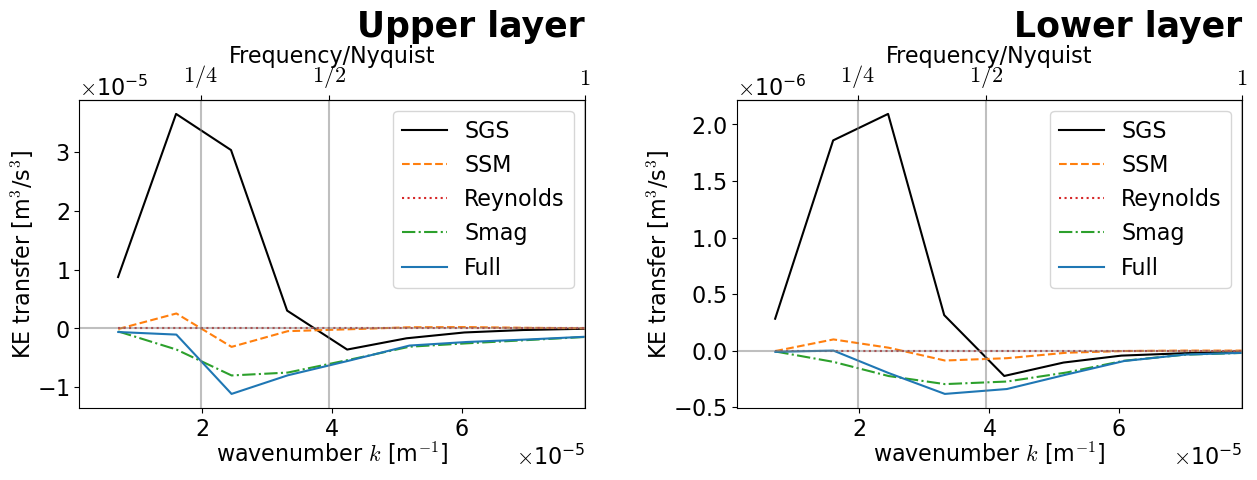

In [214]:
ds.plot_transfer('boundary10-zelong-True-ssm-True-reynolds-False-reduce-0-R2-FGR-sqrt12', target='R64_R2_FGR-sqrt6', callback=False)

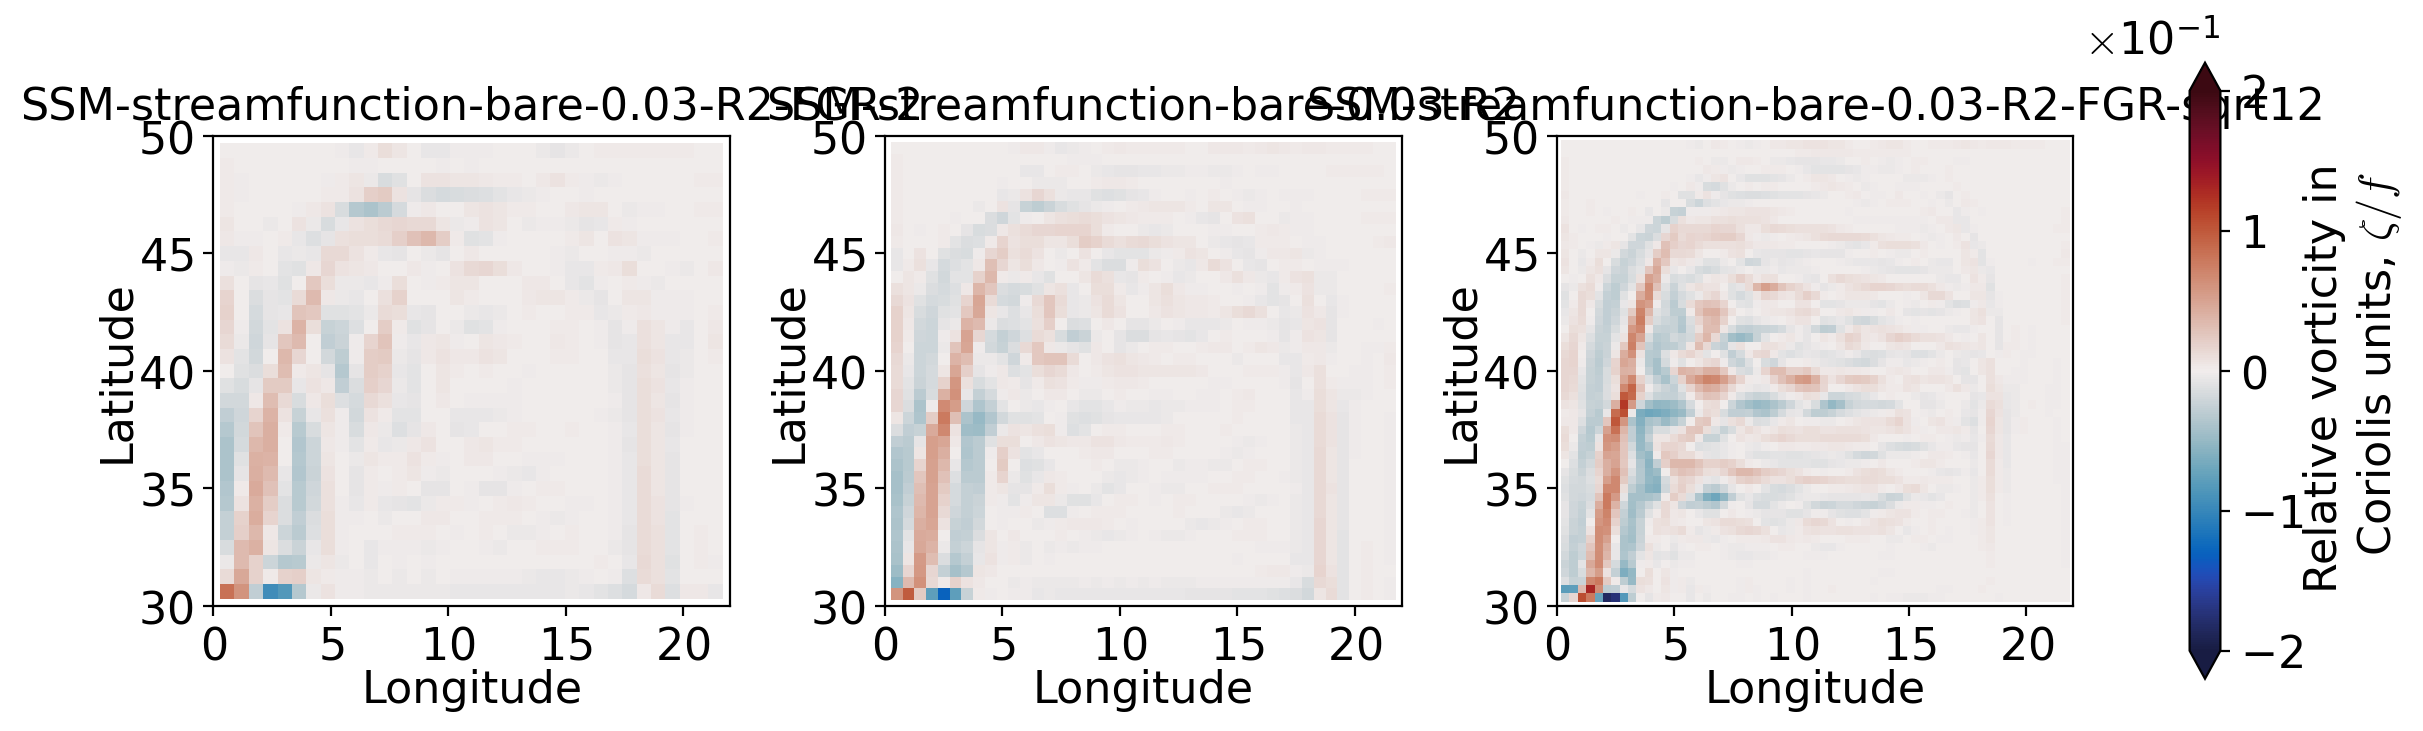

In [220]:
ds.plot_RV(['SSM-streamfunction-bare-0.03-R2-FGR-2', 'SSM-streamfunction-bare-0.03-R2', 'SSM-streamfunction-bare-0.03-R2-FGR-sqrt12'])

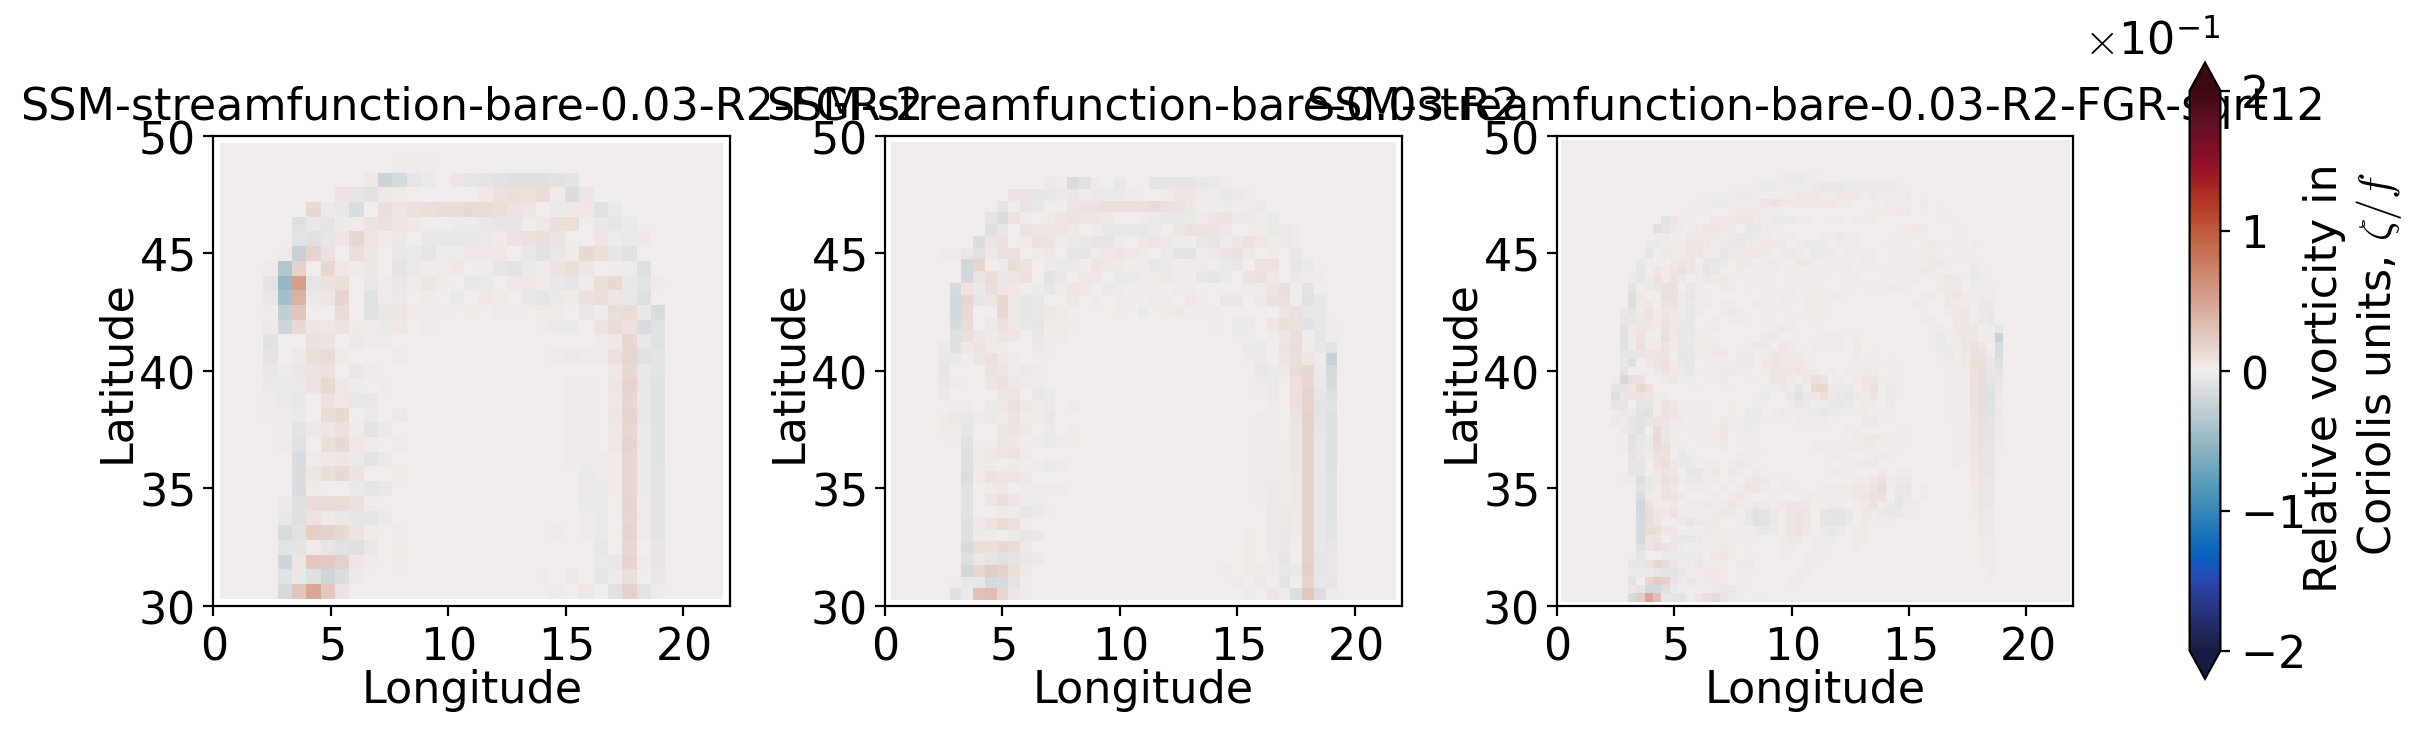

In [221]:
ds.plot_RV(['SSM-streamfunction-bare-0.03-R2-FGR-2', 'SSM-streamfunction-bare-0.03-R2', 'SSM-streamfunction-bare-0.03-R2-FGR-sqrt12'],zl=-1)

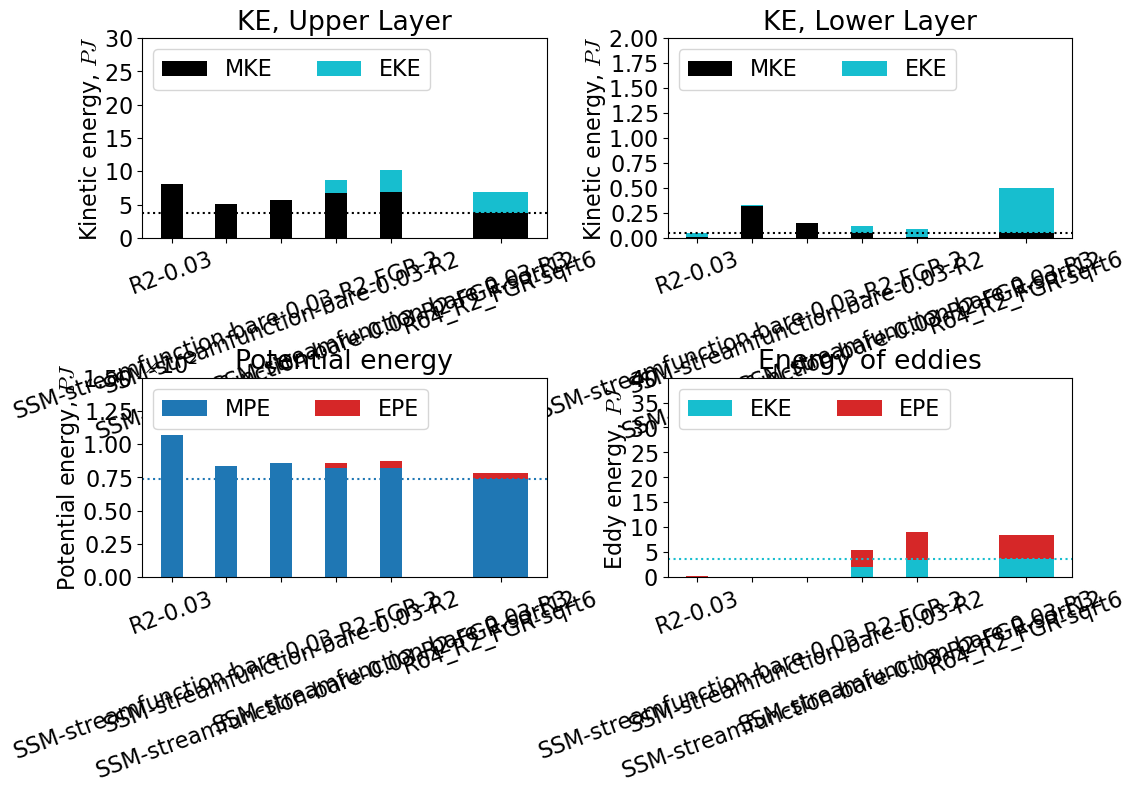

In [231]:
ds.plot_KE_PE(['R2-0.03', 'SSM-streamfunction-bare-0.03-R2-FGR-2', 'SSM-streamfunction-bare-0.03-R2', 'SSM-streamfunction-bare-0.03-R2-FGR-sqrt12', 'SSM-streamfunction-bare-0.03-R3', 'R64_R2_FGR-sqrt6'])

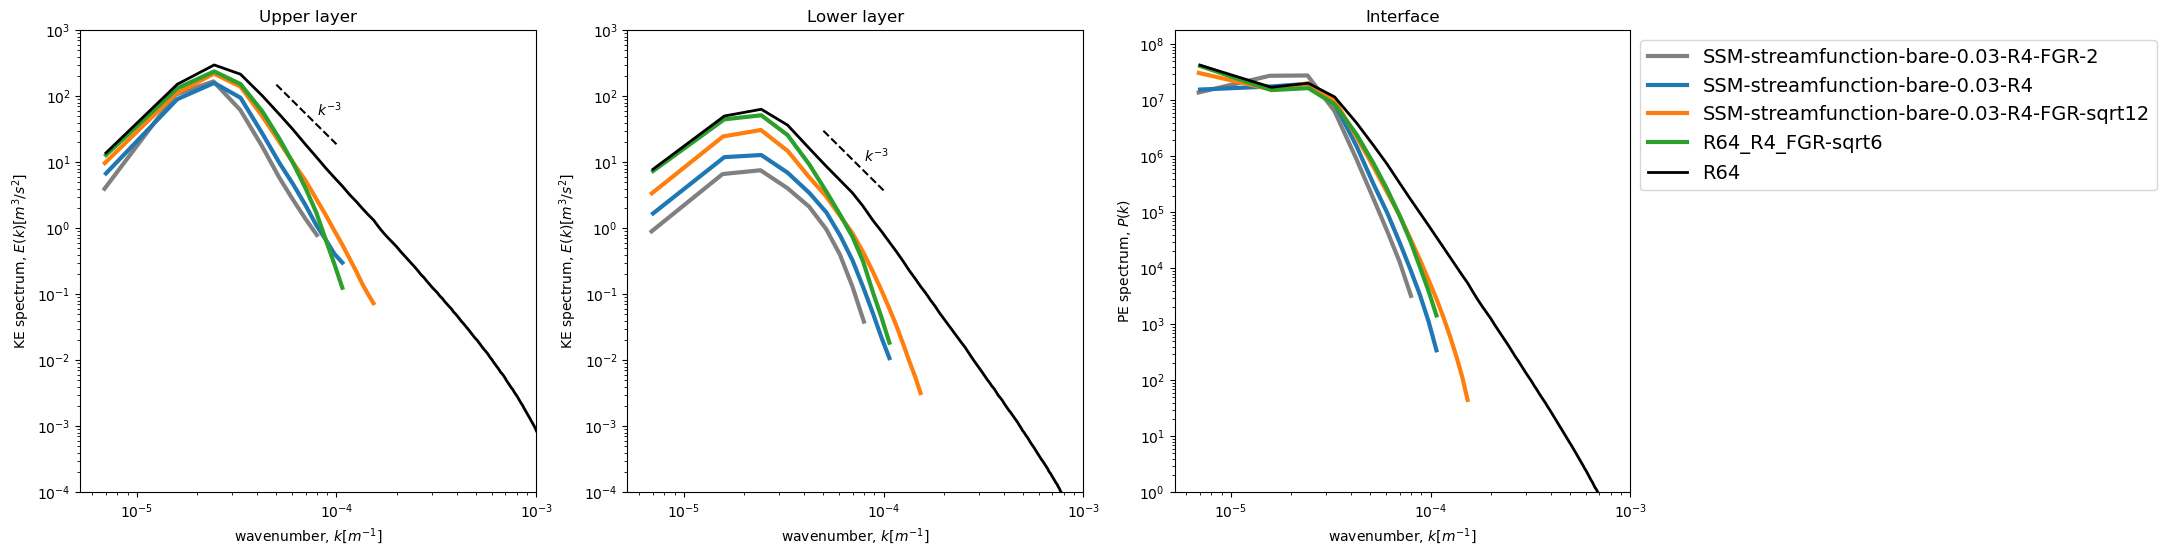

In [7]:
ds.plot_KE_PE_spectrum(['SSM-streamfunction-bare-0.03-R4-FGR-2', 'SSM-streamfunction-bare-0.03-R4', 'SSM-streamfunction-bare-0.03-R4-FGR-sqrt12', 
                        'R64_R4_FGR-sqrt6', 'R64']
                      )

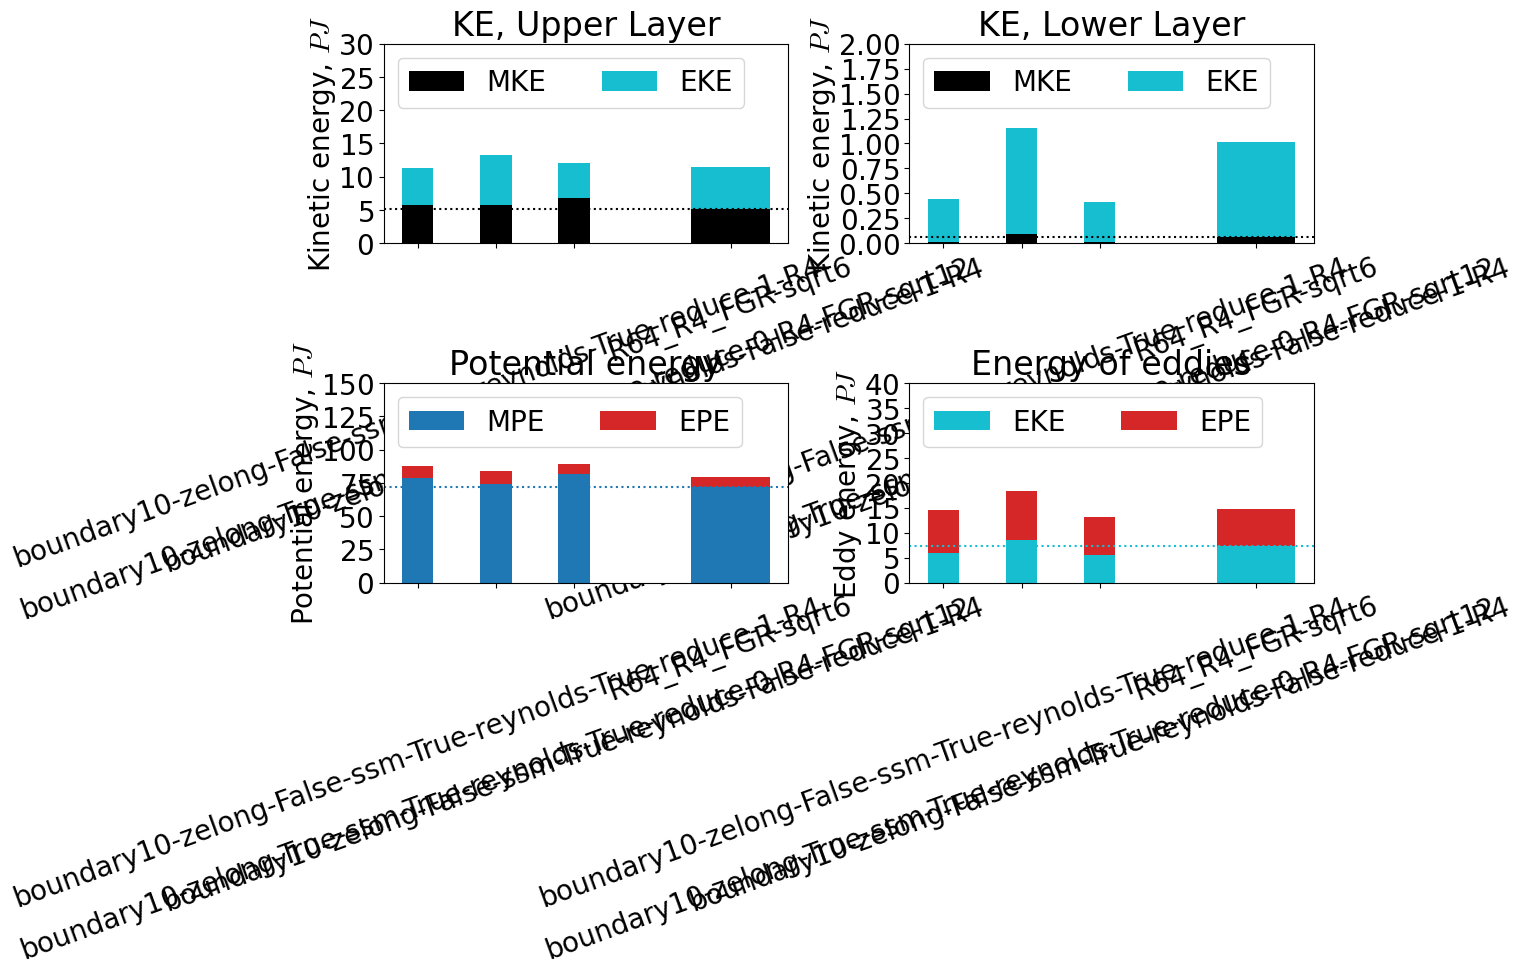

In [236]:
ds.plot_KE_PE(['boundary10-zelong-False-ssm-True-reynolds-True-reduce-1-R4', 
               'boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R4-FGR-sqrt12', 
               'boundary10-zelong-False-ssm-True-reynolds-False-reduce-1-R4', 
               'R64_R4_FGR-sqrt6'])